<a href="https://colab.research.google.com/github/Siddhi124github/data-science-prac-1-and-2/blob/main/Sheth_L_U_J_%26_Sir_M_v_college_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SIDDHI NAIK T096


# **PRACTICAL 9**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


**Reducing Features Using Principal Components**

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

df = pd.read_csv("data.csv")

print("HEAD:\n", df.head())

X = df.drop(columns=["id", "diagnosis"], errors="ignore")
y = df["diagnosis"]

print("\nTotal ORIGINAL features:", X.shape[1])

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_imputed)

pca2 = PCA(n_components=2)
reduced2 = pca2.fit_transform(scaled_X)

print("\nReduced shape (2 components):", reduced2.shape)
print("Total REDUCED features (2 comps):", reduced2.shape[1])
print("Explained variance (2 comps):", pca2.explained_variance_ratio_)

pca95 = PCA(n_components=0.95)
reduced95 = pca95.fit_transform(scaled_X)

print("\nReduced shape (95% variance):", reduced95.shape)
print("Total REDUCED features (95%):", reduced95.shape[1])
print("Number of components:", pca95.n_components_)
print("Explained variance:", pca95.explained_variance_ratio_)


HEAD:
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smo

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


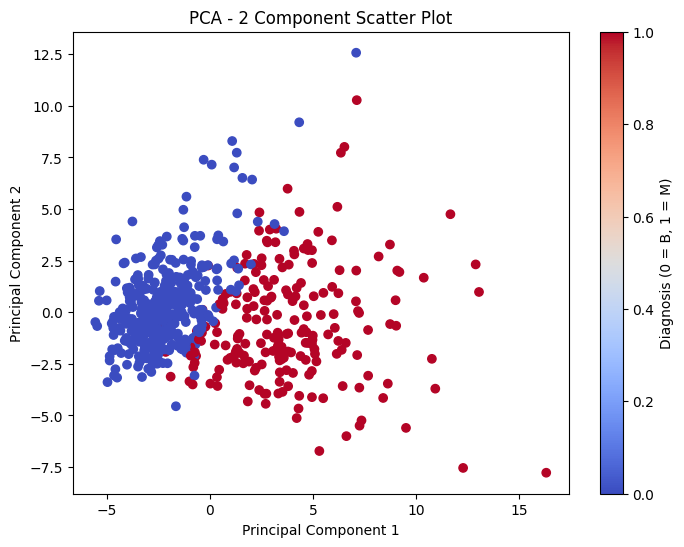

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(reduced2[:,0], reduced2[:,1], c=(y=="M"), cmap='coolwarm')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - 2 Component Scatter Plot")
plt.colorbar(label="Diagnosis (0 = B, 1 = M)")
plt.show()


***Reducing Features When Data Is Linearly Inseparable***

Original number of features: 2
Reduced number of features: 1


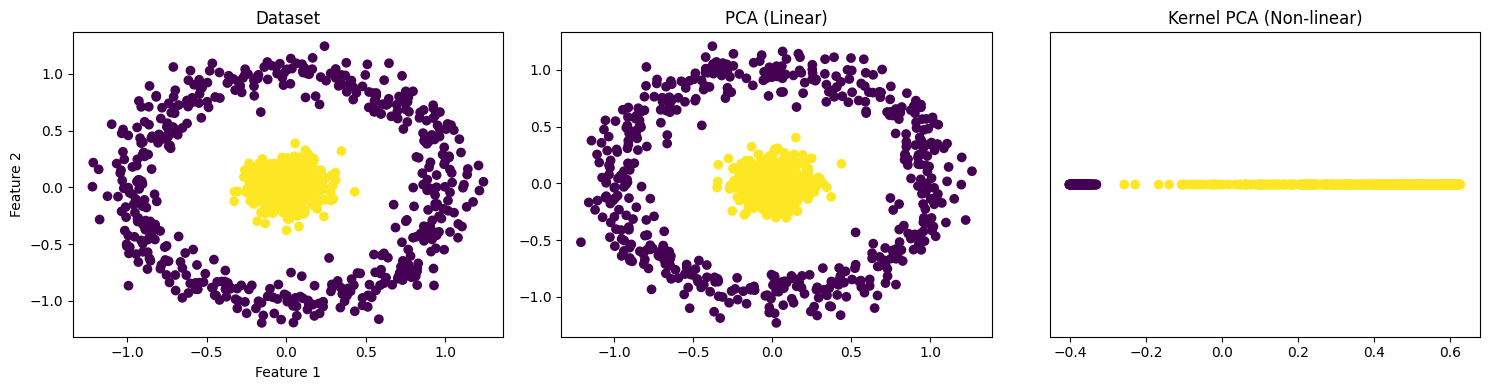

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA, KernelPCA

# Non-linearly inseparable data
X, y = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)

# PCA (linear)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Kernel PCA (non-linear)
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
X_kpca = kpca.fit_transform(X)

# Print dimensions
print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_kpca.shape[1])

# Plots
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.title("Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1,3,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
plt.title("PCA (Linear)")

plt.subplot(1,3,3)
plt.scatter(X_kpca[:,0], [0]*len(X_kpca), c=y, cmap='viridis')
plt.title("Kernel PCA (Non-linear)")
plt.yticks([])

plt.tight_layout()
plt.show()


**Reducing Features by Maximizing Class Separability**

Original number of features: 10
Reduced number of features: 2


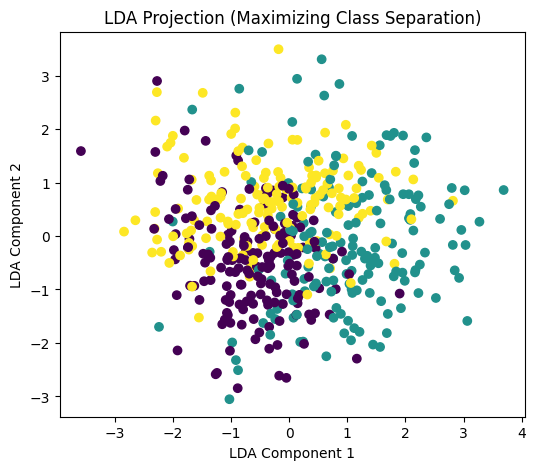

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create a dataset with 3 classes (LDA needs this for 2D)
X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=5,
    n_redundant=0,
    n_classes=3,
    random_state=1
)

print("Original number of features:", X.shape[1])

# LDA (supervised)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

print("Reduced number of features:", X_lda.shape[1])

# Plot LDA projection
plt.figure(figsize=(6,5))
plt.scatter(X_lda[:,0], X_lda[:,1], c=y, cmap='viridis')
plt.title("LDA Projection (Maximizing Class Separation)")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.show()


/tmp/ipython-input-1508699666.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({"B":0, "M":1})


Original number of features: 30
Reduced number of features after LDA: 1


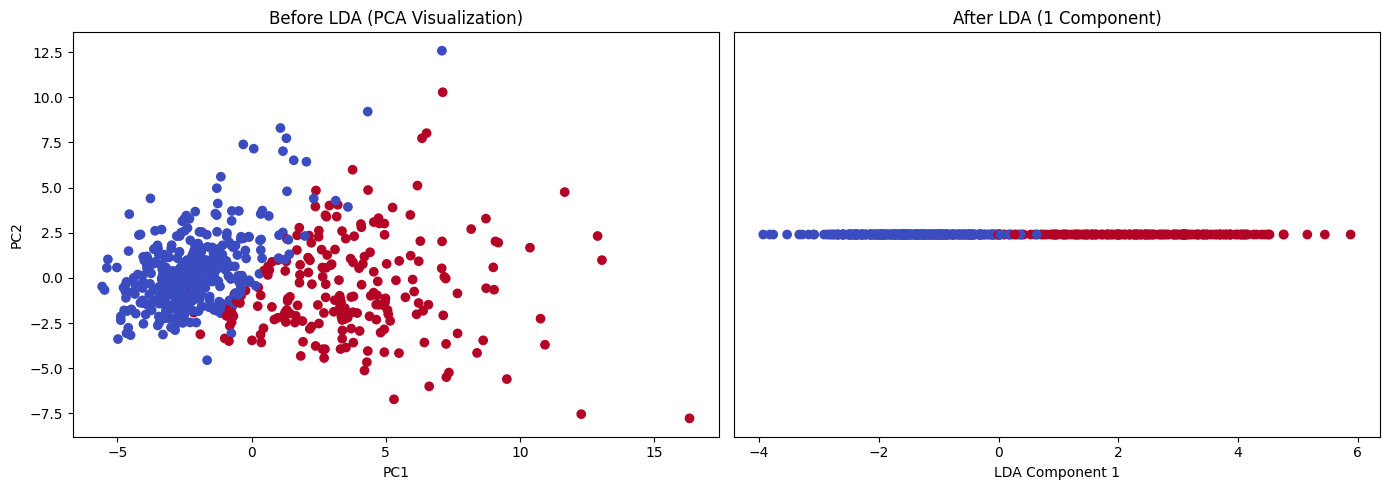

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd

# Load your file
df = pd.read_csv("data.csv")

# Drop useless columns
df = df.drop(columns=[c for c in df.columns if c.startswith("Unnamed")], errors="ignore")
df = df.drop(columns=["id"], errors="ignore")

# Separate features/target
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Encode labels (B=0, M=1)
y = y.replace({"B":0, "M":1})

# Handle missing values + scale
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# PCA for BEFORE plot (just for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# LDA for AFTER plot
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

print("Original number of features:", X.shape[1])
print("Reduced number of features after LDA:", X_lda.shape[1])

# Plotting
plt.figure(figsize=(14,5))

# BEFORE LDA (using PCA 2D visualization)
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm')
plt.title("Before LDA (PCA Visualization)")
plt.xlabel("PC1")
plt.ylabel("PC2")

# AFTER LDA (1D line)
plt.subplot(1,2,2)
plt.scatter(X_lda[:,0], [0]*len(X_lda), c=y, cmap='coolwarm')
plt.title("After LDA (1 Component)")
plt.yticks([])
plt.xlabel("LDA Component 1")

plt.tight_layout()
plt.show()
